## Лаборатторная работа №1 (основы работы с numpy)


Для начала подгрузим необходимые библиотеки

In [37]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats

Далее загрузим датасет из файла в датафрейм

In [3]:
df_train = pd.read_csv("../datasets/titanic/train.csv")
df_test = pd.read_csv("../datasets/titanic/test.csv")

Выведем размерность датасета

In [4]:
df_train.shape

(891, 12)

Выведем первые десять строчек из датасета

In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Выведем последние 5 строк

In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Выведем краткую сводку по датасету

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Выведем характеричтики признаков датасета

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Уберем все строки с пустыми ячейками

In [113]:
df_train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


Уберем все дублирующиеся строки

In [10]:
df_train.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Задания


1. Определите количество мужчин и женщин, которые ехали на корабле.

In [24]:
print("Males: {}\nFemales: {}".format(
    len(df_train[df_train["Sex"]=="male"]),
    len(df_train[df_train["Sex"]=="female"]))
)

Males: 577
Females: 314


2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [28]:
print("Survived: {} ({:.2%})".format(
    len(df_train[df_train["Survived"]==1]),
    len(df_train[df_train["Survived"]==1])/len(df_train)
))

Survived: 342 (38.38%)


3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [29]:
print("Survived: {} ({:.2%})".format(
    len(df_train[df_train["Pclass"]==1]),
    len(df_train[df_train["Pclass"]==1])/len(df_train)
))

Survived: 216 (24.24%)


4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [31]:
print("Age mean: {:.2f}, age median: {:.2f}".format(
    df_train["Age"].mean(),
    df_train["Age"].median()
))

Age mean: 29.70, age median: 28.00


5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [48]:
print("Pearson correlation: {:.4f}, p-value: {:.4f}".format(
    *stats.pearsonr(df_train["SibSp"],df_train["Parch"])
))

Pearson correlation: 0.4148, p-value: 0.0000


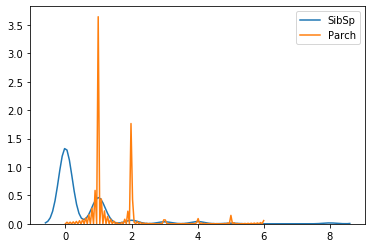

In [60]:
sns.kdeplot(df_train["SibSp"])
sns.kdeplot(df_train[ "Parch"])

6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [138]:
def name_filter(name):
    if name.split()[1]=="Miss":
        return name.split()[2]
    elif name.split()[1]=="Mrs.":
        sname = ""
        for sn in name.split():
            if sn.startswith("("):
                return sn[1:]
                
df_train[df_train["Sex"]=="female"]["Name"].apply(name_filter).value_counts().idxmax()

'Elizabeth'

7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [97]:
print("Pearson correlation: {:.4f}, p-value: {:.4f}".format(
    *stats.pearsonr(df_train["Pclass"],df_train["Survived"])
))

Pearson correlation: -0.3385, p-value: 0.0000


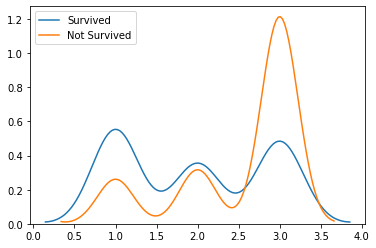

In [110]:
sns.kdeplot(df_train[df_train["Survived"]==1]["Pclass"].rename("Survived"))
sns.kdeplot(df_train[df_train["Survived"]==0]["Pclass"].rename("Not Survived"))

8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

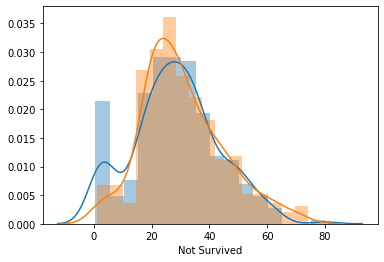

In [123]:
sns.distplot(df_train[df_train["Survived"]==1]["Age"].dropna().rename("Survived"))
sns.distplot(df_train[df_train["Survived"]==0]["Age"].dropna().rename("Not Survived"))

9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


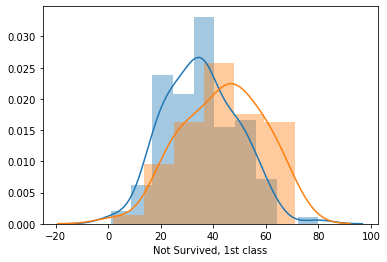

In [128]:
sns.distplot(df_train[df_train["Survived"]==1][df_train["Pclass"]==1]["Age"].dropna().rename("Survived, 1st class"))
sns.distplot(df_train[df_train["Survived"]==0][df_train["Pclass"]==1]["Age"].dropna().rename("Not Survived, 1st class"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


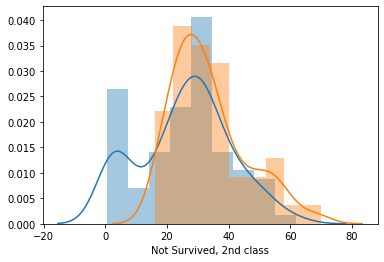

In [129]:
sns.distplot(df_train[df_train["Survived"]==1][df_train["Pclass"]==2]["Age"].dropna().rename("Survived, 2nd class"))
sns.distplot(df_train[df_train["Survived"]==0][df_train["Pclass"]==2]["Age"].dropna().rename("Not Survived, 2nd class"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


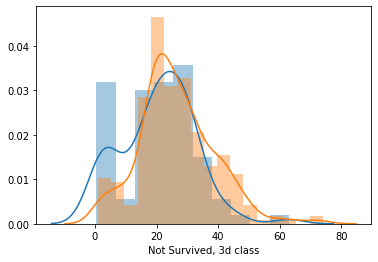

In [130]:
sns.distplot(df_train[df_train["Survived"]==1][df_train["Pclass"]==3]["Age"].dropna().rename("Survived, 3d class"))
sns.distplot(df_train[df_train["Survived"]==0][df_train["Pclass"]==3]["Age"].dropna().rename("Not Survived, 3d class"))

10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


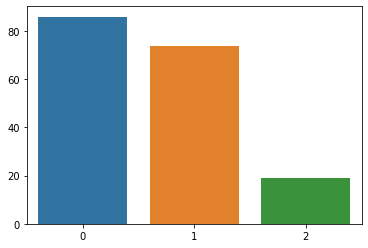

In [136]:
sns.barplot(data=[[
    len(df_train.dropna()[df_train["Sex"]=="male"][df_train["Age"]>18])
],[
    len(df_train.dropna()[df_train["Sex"]=="female"][df_train["Age"]>18])
],[
    len(df_train.dropna()[df_train["Age"]<18])
]])